In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/gdrive/MyDrive/dataset/"

In [ ]:
df_users_full = pd.read_csv(path + "users.csv")
df_users1 = df_users_full[["user_id","functional_unit","department"]]
df_users = df_users1[df_users1.functional_unit == "2 - ResearchAndEngineering"]
df_users = df_users[(df_users.department != "1 - Research")]
df_users = pd.DataFrame(df_users)

In [ ]:
df_users

,user_id,functional_unit,department
8,HBB0090,2 - ResearchAndEngineering,3 - Engineering
10,QCF0390,2 - ResearchAndEngineering,3 - Engineering
11,JDD0087,2 - ResearchAndEngineering,3 - Engineering
12,AAN0077,2 - ResearchAndEngineering,3 - Engineering
13,GJP0098,2 - ResearchAndEngineering,3 - Engineering
...,...,...,...
17318,KRM0241,2 - ResearchAndEngineering,3 - Engineering
17320,ORC0907,2 - ResearchAndEngineering,2 - SoftwareManagement
17325,REM0274,2 - ResearchAndEngineering,3 - Engineering
17332,QKA0388,2 - ResearchAndEngineering,3 - Engineering


In [ ]:
df_users = df_users.dropna(axis = 0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 8 to 17333
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          3991 non-null   object
 1   functional_unit  3991 non-null   object
 2   department       3991 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [ ]:
df_device = pd.read_csv(path + "device.csv")

In [ ]:
df_file = pd.read_csv(path + "file.csv")

In [ ]:
df_logon = pd.read_csv(path + "logon.csv")

In [ ]:
df_psychometric = pd.read_csv(path + "psychometric.csv")
df_psychometric = df_psychometric[['employee_name','user_id','O','C','E', 'A', 'N']]

In [ ]:
df_users_clean = df_users.rename(columns= {'user_id':'user'}, inplace=False)

In [ ]:
df_logon_users = pd.merge(df_logon, df_users_clean, on = 'user')
df_logon_users_clean = df_logon_users.drop(columns=['functional_unit', 'department'])


In [ ]:
df_device_users = pd.merge(df_device, df_users_clean, on='user')
df_device_users_clean = df_device_users.drop(columns=['functional_unit','department'])

In [ ]:
df_device_users = pd.merge(df_device, df_users_clean, on = 'user')
df_device_users_clean = df_device_users.drop(columns = ['functional_unit', 'department'])


In [ ]:
df_file_users = pd.merge(df_file, df_users_clean, on = 'user')
df_file_users_clean = df_file_users.drop(columns = ['functional_unit', 'department'])


In [ ]:
df_psychometric_users = pd.merge(df_psychometric, df_users, on = 'user_id')
df_psychometric_users_clean = df_psychometric_users[['employee_name', 'user_id','O', 'C', 'E','A','N']]


In [ ]:
df_logon_users_clean['date'] = pd.to_datetime(df_logon_users_clean['date'])

In [ ]:
df_logon_users_clean['time'] = df_logon_users_clean['date'].dt.time

In [ ]:
df_user_logon = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logon']

In [ ]:
df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_user_logon_stats = df_user_logon.groupby('user')['time'].agg([min,max]).reset_index()

In [ ]:
df_logon_mode = df_user_logon.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [ ]:
df_logon_mean = df_user_logon.groupby('user')['hour'].mean().reset_index()
df_logon_mean['hour'].dtype
df_logon_mean['hour'] = pd.to_datetime(df_logon_mean['hour'], format='%H').dt.time


In [ ]:
df_user_logon_stats['mode'] = df_logon_mode['time']
df_user_logon_stats['mean'] = df_logon_mean['hour']

In [ ]:
df_user_logoff = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logoff']

In [ ]:
df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
df_user_logoff['time'] = df_user_logoff['date'].dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

df_user_logoff['hour'] = pd.to_datetime(df_user_logoff['date'], format='%H:%M').dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_user_logoff_stats = df_user_logoff.groupby('user')['time'].agg([min,max]).reset_index()

In [ ]:
df_user_logoff.groupby('user')['time'].agg(pd.Series.mode).reset_index()

,user,time
0,AAN0077,16:56:00
1,AAW0103,16:14:00
2,ACE0265,16:06:00
3,ACL0394,17:15:00
4,ADR0362,16:45:00
...,...,...
225,XTM0246,17:00:00
226,YJT0368,16:45:00
227,YSB0779,16:45:00
228,ZBL0379,19:30:00


In [ ]:
df_logoff_mode = df_user_logoff.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [ ]:
df_logoff_mean = df_user_logoff.groupby('user')['hour'].mean().reset_index()
df_logoff_mean['hour'] = df_logoff_mean['hour'].astype(int)
df_logoff_mean['hour'] = pd.to_datetime(df_logoff_mean['hour'], format='%H').dt.time


In [ ]:
df_user_logoff_stats['mode'] = df_logoff_mode['time']
df_user_logoff_stats['mean'] = df_logoff_mean['hour']

In [ ]:
df_device_users_clean['time'] = pd.to_datetime(df_device_users_clean['date']).dt.time

In [ ]:
df_device_conn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Connect']
df_device_disconn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Disconnect']


In [ ]:
df_device_conn_stats = df_device_conn.groupby('user')['time'].agg([min, max]).reset_index()

In [ ]:
df_device_conn_stats_1 = df_device_conn.groupby('user')

In [ ]:
df_conn_mode = df_device_conn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [ ]:
df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_conn_mean = df_device_conn.groupby('user')['hour'].mean().reset_index()
df_conn_mean['hour'] = df_conn_mean['hour'].astype(int)
df_conn_mean['hour'] = pd.to_datetime(df_conn_mean['hour'],format="%H").dt.time

In [ ]:
df_device_conn_stats['mode'] = df_conn_mode['time']
df_device_conn_stats['mean'] = df_conn_mean['hour']

In [ ]:
df_device_disconn_stats = df_device_disconn.groupby('user')['time'].agg([min,max]).reset_index()

In [ ]:
df_dconn_mode = df_device_disconn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()



In [ ]:
df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_dconn_mean = df_device_disconn.groupby('user')['hour'].mean().reset_index()
df_dconn_mean['hour'] = df_dconn_mean['hour'].astype(int)
df_dconn_mean['hour'] = pd.to_datetime(df_dconn_mean['hour'], format='%H').dt.time


In [ ]:
df_dconn_mean

,user,hour
0,AJQ0376,14:00:00
1,AJR0231,11:00:00
2,AOD0066,12:00:00
3,ARH0777,12:00:00
4,BCP0247,12:00:00
5,BDS0396,13:00:00
6,BMS0057,15:00:00
7,BZK0095,11:00:00
8,CAE0080,12:00:00
9,CGH0088,12:00:00


In [ ]:
df_device_disconn_stats['mode'] = df_dconn_mode['time']
df_device_disconn_stats['mean'] = df_dconn_mean['hour']

In [ ]:
df_file_users_clean['date2'] = pd.to_datetime(df_file_users_clean['date']).dt.date

In [ ]:
df_files_per_day = df_file_users_clean.groupby(['user', 'date2']).size().reset_index()

In [ ]:
df_files_per_day.rename(columns={0:'transfers_per_day'}, inplace=True)


In [ ]:
df_files_max_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()
df_files_max_per_day.rename(columns={'transfers_per_day': "max_transfers_per_user"}, inplace=True)

In [ ]:
df_files_mode_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(lambda x: x.value_counts().index[0]).reset_index()
df_files_mode_per_day.rename(columns={'transfers_per_day': "mode_transfers_per_user"}, inplace=True)


In [ ]:
df_files_mode_per_day

,user,mode_transfers_per_user
0,AJQ0376,486
1,AJR0231,90
2,AOD0066,30
3,ARH0777,36
4,BCP0247,72
5,BDS0396,72
6,BMS0057,36
7,BZK0095,486
8,CAE0080,36
9,CGH0088,18


In [ ]:
df_files_stats = df_files_mode_per_day

In [ ]:
df_files_stats_new = pd.DataFrame()
df_files_stats_new['user'] = df_files_stats['user']
df_files_stats_new['mode_trasfers_per_user'] = df_files_stats['mode_transfers_per_user']
df_files_stats_new['max_transfers_per_user'] = df_files_max_per_day['max_transfers_per_user']


In [ ]:
df_user_pc = df_logon_users_clean.groupby(['user','pc',]).agg(pc_visits_per_user_total = pd.NamedAgg(column = 'pc', aggfunc = 'count')).reset_index()
df_user_pc['count'] = df_user_pc.groupby(['user'])['pc'].transform('nunique')
df_user_pc = df_user_pc.drop(['pc', 'pc_visits_per_user_total'], axis=1)
df_user_pc = df_user_pc.drop_duplicates()

In [ ]:
df_user_pc

,user,count
0,AAN0077,1
1,AAW0103,1
2,ACE0265,1
3,ACL0394,2
5,ADR0362,1
...,...,...
632,XTM0246,1
633,YJT0368,2
635,YSB0779,1
636,ZBL0379,1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df_user_pc_count = np.array(df_user_pc['count'])

In [ ]:
df_user_pc_ct = df_user_pc_count.reshape(-1,1)

In [ ]:
df_user_pc.columns

Index(['user', 'count'], dtype='object')

In [ ]:
#user pc
forest = IsolationForest(bootstrap=False, contamination=0.1,max_features=1.0,
                         max_samples='auto',n_estimators=100, n_jobs=1, random_state=None,
                         verbose=0)
forest.fit(df_user_pc_ct)


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle 
with open('user_pc_ct.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
graph_a_score = forest.decision_function(df_user_pc_ct)
print(graph_a_score[1:10])

[0.08620422 0.08620422 0.00292229 0.08620422 0.08620422 0.08620422
 0.08620422 0.08620422 0.08620422]


In [ ]:
graph_result = pd.DataFrame()
graph_result['user'] = df_user_pc['user']
graph_result['ascore'] = graph_a_score
print(graph_result)

        user    ascore
0    AAN0077  0.086204
1    AAW0103  0.086204
2    ACE0265  0.086204
3    ACL0394  0.002922
5    ADR0362  0.086204
..       ...       ...
632  XTM0246  0.086204
633  YJT0368  0.002922
635  YSB0779  0.086204
636  ZBL0379  0.086204
637  ZIF0269  0.086204

[230 rows x 2 columns]


In [ ]:
outliers = graph_result.loc[graph_result['ascore'] < 0]
print(outliers)

        user    ascore
14   AJR0231 -0.243979
54   ALC0100 -0.163825
96   ARH0777 -0.175101
110  BGZ0902 -0.270585
154  CGH0088 -0.175101
167  CQS0899 -0.235983
205  DNS0397 -0.231524
218  EER0383 -0.182880
254  FED0275 -0.269544
401  LWB0078 -0.364549
489  PYT0264 -0.212038
580  WJP0386 -0.282661
592  WMP0272 -0.191683


In [ ]:
def dtt2timestamp(dtt):
  time_in_sec = (dtt.hour*60 + dtt.minute) * 60 + dtt.second
  return time_in_sec

In [ ]:
df_user_logon_stats_sec = df_user_logon_stats


In [ ]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['min']]
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mean']]

In [ ]:
df_user_logon_stats_sec['min_ts'] = min_ts
df_user_logon_stats_sec['max_ts'] = max_ts
df_user_logon_stats_sec['mode_ts'] = mode_ts
df_user_logon_stats_sec['mean_ts'] = mean_ts

In [ ]:
df_user_logon_stats_sec.drop(['min','max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,27900,29580,29580,25200
1,AAW0103,25200,26280,26100,25200
2,ACE0265,28800,30300,29700,28800
3,ACL0394,32400,60757,33300,32400
4,ADR0362,27000,28080,28080,25200
...,...,...,...,...,...
225,XTM0246,27900,29520,29460,25200
226,YJT0368,27000,68459,27900,25200
227,YSB0779,27000,28020,27900,25200
228,ZBL0379,29700,52585,30600,36000


In [ ]:
df_user_logoff_stats_sec = df_user_logoff_stats


In [ ]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mean']]

In [ ]:
df_user_logoff_stats_sec['min_ts'] = min_ts
df_user_logoff_stats_sec['max_ts'] = max_ts
df_user_logoff_stats_sec['mode_ts'] = mode_ts
df_user_logoff_stats_sec['mean_ts'] = mean_ts

In [ ]:
df_user_logoff_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,60420,62100,60960,57600
1,AAW0103,58320,59400,58440,57600
2,ACE0265,57900,59400,57960,57600
3,ACL0394,33235,63000,62100,57600
4,ADR0362,60120,61200,60300,57600
...,...,...,...,...,...
225,XTM0246,60480,62100,61200,57600
226,YJT0368,27293,68732,60300,54000
227,YSB0779,60180,61200,60300,57600
228,ZBL0379,69420,71100,70200,68400


In [ ]:
df_log_on_off_stats = pd.DataFrame()

df_log_on_off_stats['user'] = df_user_logon_stats_sec['user']
df_log_on_off_stats['on_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['on_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['on_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['on_mean_ts'] = df_user_logon_stats_sec['mean_ts']
df_log_on_off_stats['off_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['off_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['off_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['off_mean_ts'] = df_user_logon_stats_sec['mean_ts']

In [ ]:
df_log_on_off_stats.dtypes

user           object
on_min_ts       int64
on_max_ts       int64
on_mode_ts      int64
on_mean_ts      int64
off_min_ts      int64
off_max_ts      int64
off_mode_ts     int64
off_mean_ts     int64
dtype: object

In [ ]:
log_stats = df_log_on_off_stats.drop(['user'], axis = 1)
log_stats_matrix = np.matrix(log_stats)
print(log_stats_matrix)

[[27900 29580 29580 ... 29580 29580 25200]
 [25200 26280 26100 ... 26280 26100 25200]
 [28800 30300 29700 ... 30300 29700 28800]
 ...
 [27000 28020 27900 ... 28020 27900 25200]
 [29700 52585 30600 ... 52585 30600 36000]
 [25200 26760 26100 ... 26760 26100 25200]]


In [ ]:
df_log_on_off_stats.columns

Index(['user', 'on_min_ts', 'on_max_ts', 'on_mode_ts', 'on_mean_ts',
       'off_min_ts', 'off_max_ts', 'off_mode_ts', 'off_mean_ts'],
      dtype='object')

In [ ]:
#logon
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
        verbose=0)
forest.fit(log_stats_matrix)
log_ascore = forest.decision_function(log_stats_matrix)
log_ascore[:10]

array([0.04921569, 0.11186466, 0.16658077, 0.02533861, 0.15092186,
       0.20002464, 0.19825164, 0.19052695, 0.19950451, 0.08330242])

In [ ]:
# counting the values
df22 = pd.Series(forest.predict(log_stats_matrix))
df22 = df22.map({1:0, -1:1})
print(df22.value_counts())

0    207
1     23
dtype: int64


In [ ]:
import pickle 
with open('log_stats_matrix.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
df_user_log_result = pd.DataFrame()
df_user_log_result['user'] = df_user_logoff_stats_sec['user']
df_user_log_result['ascore'] = log_ascore
print(df_user_log_result)


        user    ascore
0    AAN0077  0.049216
1    AAW0103  0.111865
2    ACE0265  0.166581
3    ACL0394  0.025339
4    ADR0362  0.150922
..       ...       ...
225  XTM0246  0.085656
226  YJT0368  0.040094
227  YSB0779  0.198252
228  ZBL0379  0.113442
229  ZIF0269  0.097683

[230 rows x 2 columns]


In [ ]:
df_user_log_result.loc[df_user_log_result['ascore'] < 0]

,user,ascore
14,AMR0656,-0.006770
29,BKA0340,-0.023313
31,BMS0057,-0.011798
43,BZV0067,-0.009860
56,CQS0899,-0.118650
65,DJS0406,-0.013355
73,EER0383,-0.014457
77,FED0275,-0.100801
83,GFM0250,-0.038631
86,GJP0098,-0.021151


In [ ]:
df_device_conn_stats_sec = df_device_conn_stats
con_min_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['min']]
con_max_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['max']]
con_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mode']]
con_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mean']]

df_device_conn_stats_sec['min_ts'] = con_min_ts
df_device_conn_stats_sec['max_ts'] = con_max_ts
df_device_conn_stats_sec['mode_ts'] = con_mode_ts
df_device_conn_stats_sec['mean_ts'] = con_mean_ts
df_device_conn_stats_sec = df_device_conn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

In [ ]:
df_device_disconn_stats_sec = df_device_conn_stats
discon_min_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['min']]
discon_max_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['max']]
discon_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mode']]
discon_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mean']]

df_device_disconn_stats_sec['min_ts'] = discon_min_ts
df_device_disconn_stats_sec['max_ts'] = discon_max_ts
df_device_disconn_stats_sec['mode_ts'] = discon_mode_ts
df_device_disconn_stats_sec['mean_ts'] = discon_mean_ts
df_device_disconn_stats_sec = df_device_disconn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)


In [ ]:
df_device_full = pd.DataFrame()
df_device_full['user'] = df_device_conn_stats['user']

In [ ]:
df_device_full['con_min_ts'] = df_device_conn_stats_sec['min_ts']
df_device_full['con_max_ts'] = df_device_conn_stats_sec['max_ts']
df_device_full['con_mode_ts'] = df_device_conn_stats_sec['mode_ts']
df_device_full['con_mean_ts'] = df_device_conn_stats_sec['mean_ts']

# disconnect stats
df_device_full['dcon_min_ts'] = df_device_disconn_stats_sec['min_ts']
df_device_full['dcon_max_ts'] = df_device_disconn_stats_sec['max_ts']
df_device_full['dcon_mode_ts'] = df_device_disconn_stats_sec['mode_ts']
df_device_full['dcon_mean_ts'] = df_device_disconn_stats_sec['mean_ts']

# files per day stats
df_device_full['file_mode'] = df_files_stats_new['mode_trasfers_per_user']
df_device_full['file_max'] = df_files_stats_new['max_transfers_per_user']

In [ ]:
device_full_matrix = df_device_full.drop(['user'],axis=1)
device_params = np.matrix(device_full_matrix)
device_params[:10]

matrix([[30401, 68694, 51577, 43200, 30401, 68694, 51577, 43200,   486,
           486],
        [27100, 56918, 44725, 36000, 27100, 56918, 44725, 36000,    90,
           252],
        [27693, 55895, 29934, 36000, 27693, 55895, 29934, 36000,    30,
            72],
        [27756, 59689, 50168, 39600, 27756, 59689, 50168, 39600,    36,
           144],
        [ 4870, 84764, 56477, 39600,  4870, 84764, 56477, 39600,    72,
           198],
        [33007, 61926, 35672, 39600, 33007, 61926, 35672, 39600,    72,
           234],
        [ 1185, 76882, 34017, 43200,  1185, 76882, 34017, 43200,    36,
           234],
        [28882, 59022, 45455, 39600, 28882, 59022, 45455, 39600,   486,
           486],
        [16018, 83814, 30010, 39600, 16018, 83814, 30010, 39600,    36,
           198],
        [29154, 57723, 45511, 39600, 29154, 57723, 45511, 39600,    18,
           198]])

In [ ]:
df_device_full.columns

Index(['user', 'con_min_ts', 'con_max_ts', 'con_mode_ts', 'con_mean_ts',
       'dcon_min_ts', 'dcon_max_ts', 'dcon_mode_ts', 'dcon_mean_ts',
       'file_mode', 'file_max'],
      dtype='object')

In [ ]:
# device (-user)
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(device_params)


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle 
with open('device_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:

dev_file_ascore = forest.decision_function(device_params)
print(dev_file_ascore)

[ 0.02673123  0.10980254  0.01268584  0.13681151  0.00529513  0.10641493
 -0.03759447  0.11604134  0.02611081  0.13349316  0.10056817  0.11813033
 -0.07397283  0.13753013  0.09210589  0.02397751  0.05314191  0.08734098
  0.11873575  0.13156404  0.10025925  0.09169139  0.11229966  0.10463195
  0.08911698  0.13347208  0.10914855  0.13715697  0.15823379  0.01850776
  0.0394023   0.05791709  0.03726523  0.11716326  0.06257074  0.03542374
  0.0833494  -0.05817048  0.09519608  0.02285759 -0.05184364  0.07485204
  0.13063189  0.12246247  0.10744678  0.06599504 -0.00794269]


In [ ]:
df_device_file_full_result = pd.DataFrame()

df_device_file_full_result['user'] = df_device_full['user']
df_device_file_full_result['ascore'] = dev_file_ascore
df_device_file_full_result

,user,ascore
0,AJQ0376,0.026731
1,AJR0231,0.109803
2,AOD0066,0.012686
3,ARH0777,0.136812
4,BCP0247,0.005295
5,BDS0396,0.106415
6,BMS0057,-0.037594
7,BZK0095,0.116041
8,CAE0080,0.026111
9,CGH0088,0.133493


In [ ]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0] 

,user,ascore
6,BMS0057,-0.037594
12,CSD0242,-0.073973
37,QLC0248,-0.058170
40,SBM0063,-0.051844
46,ZBL0379,-0.007943


In [ ]:
psychometric_matrix = df_psychometric_users_clean.drop(['user_id', 'employee_name'], axis = 1)
psychometric_params = np.matrix(psychometric_matrix)

In [ ]:
# psycho ds 
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(psychometric_params)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle 
with open('psychometric_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
psych_ascore = forest.decision_function(psychometric_params)
psych_ascore[:10]

array([0.04387665, 0.04387665, 0.04387665, 0.04387665, 0.04387665,
       0.04387665, 0.04387665, 0.04387665, 0.04387665, 0.04387665])

In [ ]:
df_psychometric_result = pd.DataFrame()

df_psychometric_result['user'] = df_psychometric_users_clean['user_id']
df_psychometric_result['ascore'] = psych_ascore
df_psychometric_result

,user,ascore
0,HBB0090,0.043877
1,HBB0090,0.043877
2,HBB0090,0.043877
3,HBB0090,0.043877
4,HBB0090,0.043877
...,...,...
3986,GGK0375,-0.003806
3987,GGK0375,-0.003806
3988,GGK0375,-0.003806
3989,GGK0375,-0.003806


In [ ]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0]

,user,ascore
552,ACE0265,-0.009214
553,ACE0265,-0.009214
554,ACE0265,-0.009214
555,ACE0265,-0.009214
556,ACE0265,-0.009214
...,...,...
3986,GGK0375,-0.003806
3987,GGK0375,-0.003806
3988,GGK0375,-0.003806
3989,GGK0375,-0.003806


In [ ]:
df = pd.merge(df_log_on_off_stats, df_user_pc, on='user')

In [ ]:
df_1 = pd.merge(df, df_psychometric, left_on = 'user', right_on = 'user_id')

In [ ]:
df_1.head()

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,employee_name,user_id,O,C,E,A,N
0,AAN0077,27900,29580,29580,25200,27900,29580,29580,25200,1,Allistair Akeem Nichols,AAN0077,42,15,32,22,29
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200,1,Alexa Allegra Walton,AAW0103,39,42,47,39,28
2,ACE0265,28800,30300,29700,28800,28800,30300,29700,28800,1,Amos Carson Emerson,ACE0265,26,23,14,19,40
3,ACL0394,32400,60757,33300,32400,32400,60757,33300,32400,2,Adam Clark Lindsey,ACL0394,25,44,18,19,17
4,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200,1,Amir Damian Rosario,ADR0362,32,42,35,38,26


In [ ]:
df_final = df_1.drop(['employee_name', 'user_id'], axis=1)


In [ ]:
df_all_parameters = df_final

In [ ]:
df_all_parameters_input = df_all_parameters.drop(['user'], axis = 1)

In [ ]:
print(df_all_parameters_input)

     on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  ...   C   E   A   N
0        27900      29580       29580       25200  ...  15  32  22  29
1        25200      26280       26100       25200  ...  42  47  39  28
2        28800      30300       29700       28800  ...  23  14  19  40
3        32400      60757       33300       32400  ...  44  18  19  17
4        27000      28080       28080       25200  ...  42  35  38  26
..         ...        ...         ...         ...  ...  ..  ..  ..  ..
225      27900      29520       29460       25200  ...  18  22  29  34
226      27000      68459       27900       25200  ...  35  23  44  35
227      27000      28020       27900       25200  ...  46  16  19  40
228      29700      52585       30600       36000  ...  15  44  42  28
229      25200      26760       26100       25200  ...  20  17  46  26

[230 rows x 14 columns]


In [ ]:
# psycho logon ds
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(df_all_parameters_input)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle 
with open('all_parameters_input.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
all_parameters_ascore = forest.decision_function(df_all_parameters_input)
print(all_parameters_ascore[:10])

[0.10695907 0.05961483 0.08872965 0.00710645 0.1141035  0.13204424
 0.1056402  0.13827625 0.13906855 0.04300524]


In [ ]:
df_all_parameters_result = pd.DataFrame()

df_all_parameters_result['user'] = df_final['user']
df_all_parameters_result['ascore'] = all_parameters_ascore
print(df_all_parameters_result)

        user    ascore
0    AAN0077  0.106959
1    AAW0103  0.059615
2    ACE0265  0.088730
3    ACL0394  0.007106
4    ADR0362  0.114103
..       ...       ...
225  XTM0246  0.069422
226  YJT0368  0.027414
227  YSB0779  0.101592
228  ZBL0379  0.055533
229  ZIF0269  0.049107

[230 rows x 2 columns]


In [ ]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0]

,user,ascore
13,ALC0100,-0.060349
31,BMS0057,-0.024154
56,CQS0899,-0.098143
65,DJS0406,-0.004723
66,DNS0397,-0.008681
69,DYB0399,-0.024801
73,EER0383,-0.047381
77,FED0275,-0.118413
83,GFM0250,-0.059110
95,HML0060,-0.048392


In [ ]:
df_user_log_result.head()

,user,ascore
0,AAN0077,0.049216
1,AAW0103,0.111865
2,ACE0265,0.166581
3,ACL0394,0.025339
4,ADR0362,0.150922


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2276a4c10>]],
      dtype=object)

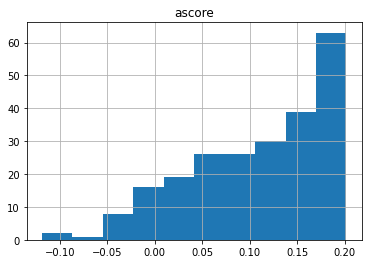

In [ ]:
df_user_log_result.hist()

In [ ]:
df_device_file_full_result.head()

,user,ascore
0,AJQ0376,0.026731
1,AJR0231,0.109803
2,AOD0066,0.012686
3,ARH0777,0.136812
4,BCP0247,0.005295


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe22714fad0>]],
      dtype=object)

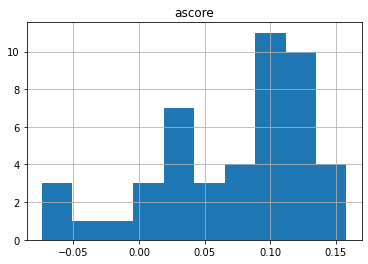

In [ ]:
# df_device_file_full_result.hist(bins = 15)
df_device_file_full_result.hist()

In [ ]:
df_psychometric_result.head()

,user,ascore
0,HBB0090,0.043877
1,HBB0090,0.043877
2,HBB0090,0.043877
3,HBB0090,0.043877
4,HBB0090,0.043877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2270d2310>]],
      dtype=object)

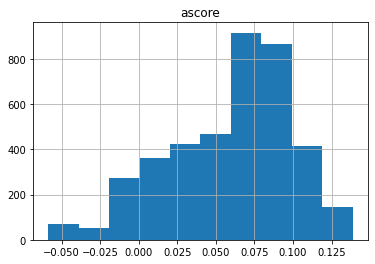

In [ ]:
df_psychometric_result.hist()

In [ ]:
df_all_parameters_result.head()

,user,ascore
0,AAN0077,0.106959
1,AAW0103,0.059615
2,ACE0265,0.088730
3,ACL0394,0.007106
4,ADR0362,0.114103


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe227065b10>]],
      dtype=object)

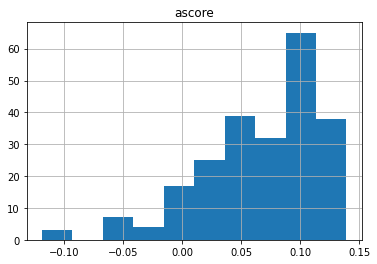

In [ ]:
df_all_parameters_result.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe226fff9d0>]],
      dtype=object)

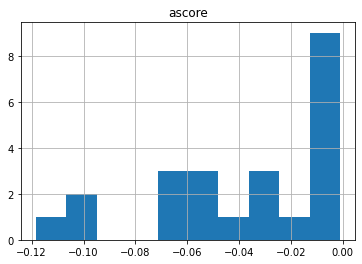

In [ ]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_all_params = df_all_parameters_result.loc[df_all_parameters_result['ascore'] < -0.065]
print(df_threat_users_all_params)

        user    ascore
56   CQS0899 -0.098143
77   FED0275 -0.118413
147  LWB0078 -0.101970
178  RAW0533 -0.066473


In [ ]:
df_all_parameters[df_all_parameters.user.isin(df_threat_users_all_params.user)]

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,O,C,E,A,N
56,CQS0899,606,85229,30600,36000,606,85229,30600,36000,27,41,38,41,24,36
77,FED0275,2462,81960,26400,28800,2462,81960,26400,28800,43,26,16,28,13,30
147,LWB0078,1104,86213,28920,28800,1104,86213,28920,28800,55,50,38,48,30,28
178,RAW0533,1401,71230,27900,25200,1401,71230,27900,25200,2,38,21,18,20,36


In [ ]:
df_device_file_full_result.head()

,user,ascore
0,AJQ0376,0.026731
1,AJR0231,0.109803
2,AOD0066,0.012686
3,ARH0777,0.136812
4,BCP0247,0.005295


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe226f80210>]],
      dtype=object)

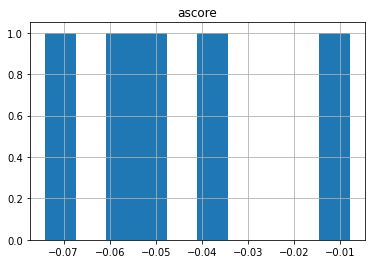

In [ ]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_device_file = df_device_file_full_result.loc[df_device_file_full_result['ascore'] <= 0]
print(df_threat_users_device_file)

       user    ascore
6   BMS0057 -0.037594
12  CSD0242 -0.073973
37  QLC0248 -0.058170
40  SBM0063 -0.051844
46  ZBL0379 -0.007943


In [ ]:
df_device_full[df_device_full.user.isin(df_threat_users_device_file.user)]

,user,con_min_ts,con_max_ts,con_mode_ts,con_mean_ts,dcon_min_ts,dcon_max_ts,dcon_mode_ts,dcon_mean_ts,file_mode,file_max
6,BMS0057,1185,76882,34017,43200,1185,76882,34017,43200,36,234
12,CSD0242,514,86209,55868,39600,514,86209,55868,39600,486,666
37,QLC0248,8753,83989,32223,43200,8753,83989,32223,43200,486,522
40,SBM0063,34,85234,48270,36000,34,85234,48270,36000,144,306
46,ZBL0379,30142,69372,52603,46800,30142,69372,52603,46800,72,252


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe226ee80d0>]],
      dtype=object)

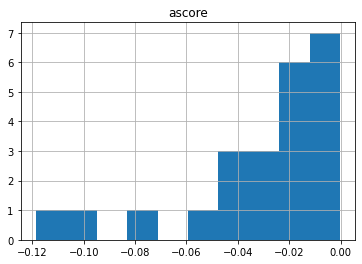

In [ ]:
df_user_log_result.head()
df_user_log_result.loc[df_user_log_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_log = df_user_log_result.loc[df_user_log_result['ascore'] <= -0.04]
print(df_threat_users_log)

        user    ascore
56   CQS0899 -0.118650
77   FED0275 -0.100801
178  RAW0533 -0.071614
180  RCG0105 -0.040896
214  VLB0069 -0.048681


In [ ]:
df_log_on_off_stats[df_log_on_off_stats.user.isin(df_threat_users_log.user)]

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts
56,CQS0899,606,85229,30600,36000,606,85229,30600,36000
77,FED0275,2462,81960,26400,28800,2462,81960,26400,28800
178,RAW0533,1401,71230,27900,25200,1401,71230,27900,25200
180,RCG0105,25200,58840,26400,25200,25200,58840,26400,25200
214,VLB0069,2059,83319,28800,25200,2059,83319,28800,25200


In [ ]:
df_psychometric_result.head()

,user,ascore
0,HBB0090,0.043877
1,HBB0090,0.043877
2,HBB0090,0.043877
3,HBB0090,0.043877
4,HBB0090,0.043877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe226e0d690>]],
      dtype=object)

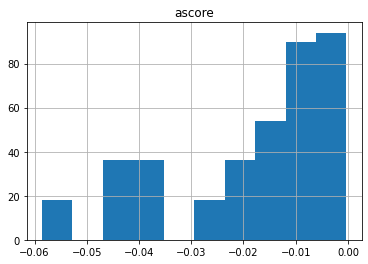

In [ ]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0].hist()

In [ ]:
df_threat_psycho = df_psychometric_result.loc[df_psychometric_result['ascore'] <= -0.04]


In [ ]:
df_psychometric_users_clean[df_psychometric_users_clean.user_id.isin(df_threat_psycho.user)]

,employee_name,user_id,O,C,E,A,N
1167,Arden Leo Chase,ALC0100,11,38,14,48,28
1168,Arden Leo Chase,ALC0100,11,38,14,48,28
1169,Arden Leo Chase,ALC0100,11,38,14,48,28
1170,Arden Leo Chase,ALC0100,11,38,14,48,28
1171,Arden Leo Chase,ALC0100,11,38,14,48,28
...,...,...,...,...,...,...,...
3744,Brock Zeus Kim,BZK0095,33,13,30,47,40
3745,Brock Zeus Kim,BZK0095,33,13,30,47,40
3746,Brock Zeus Kim,BZK0095,33,13,30,47,40
3747,Brock Zeus Kim,BZK0095,33,13,30,47,40


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

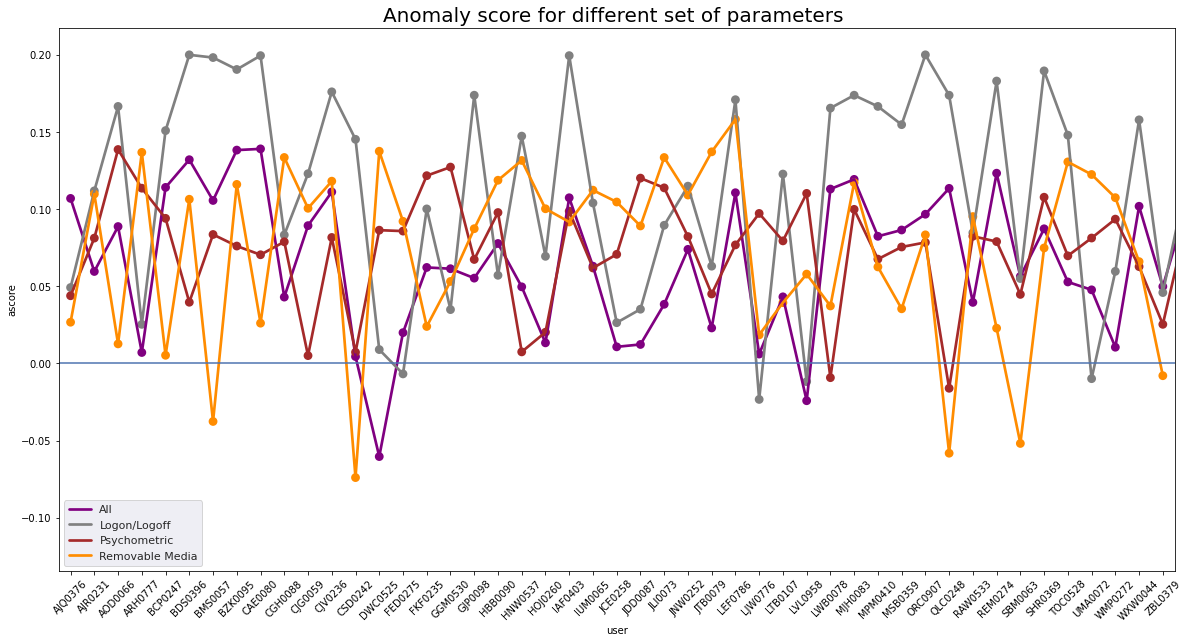

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
x_col='user'
y_col = 'ascore'
sns.set_theme(style="darkgrid")
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_all_parameters_result,color='purple')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_user_log_result,color='grey')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_psychometric_result,color='brown')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_device_file_full_result,color='darkorange')

ax.legend(handles=ax.lines[::len(df_all_parameters_result)+1], labels=["All","Logon/Logoff","Psychometric","Removable Media"])
#ax.set_xtickslabels(rotation = 45)
ax.axhline(0, ls='-')
ax.set_title('Anomaly score for different set of parameters ', size = 20)
plt.rcParams["axes.labelsize"] = 25
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

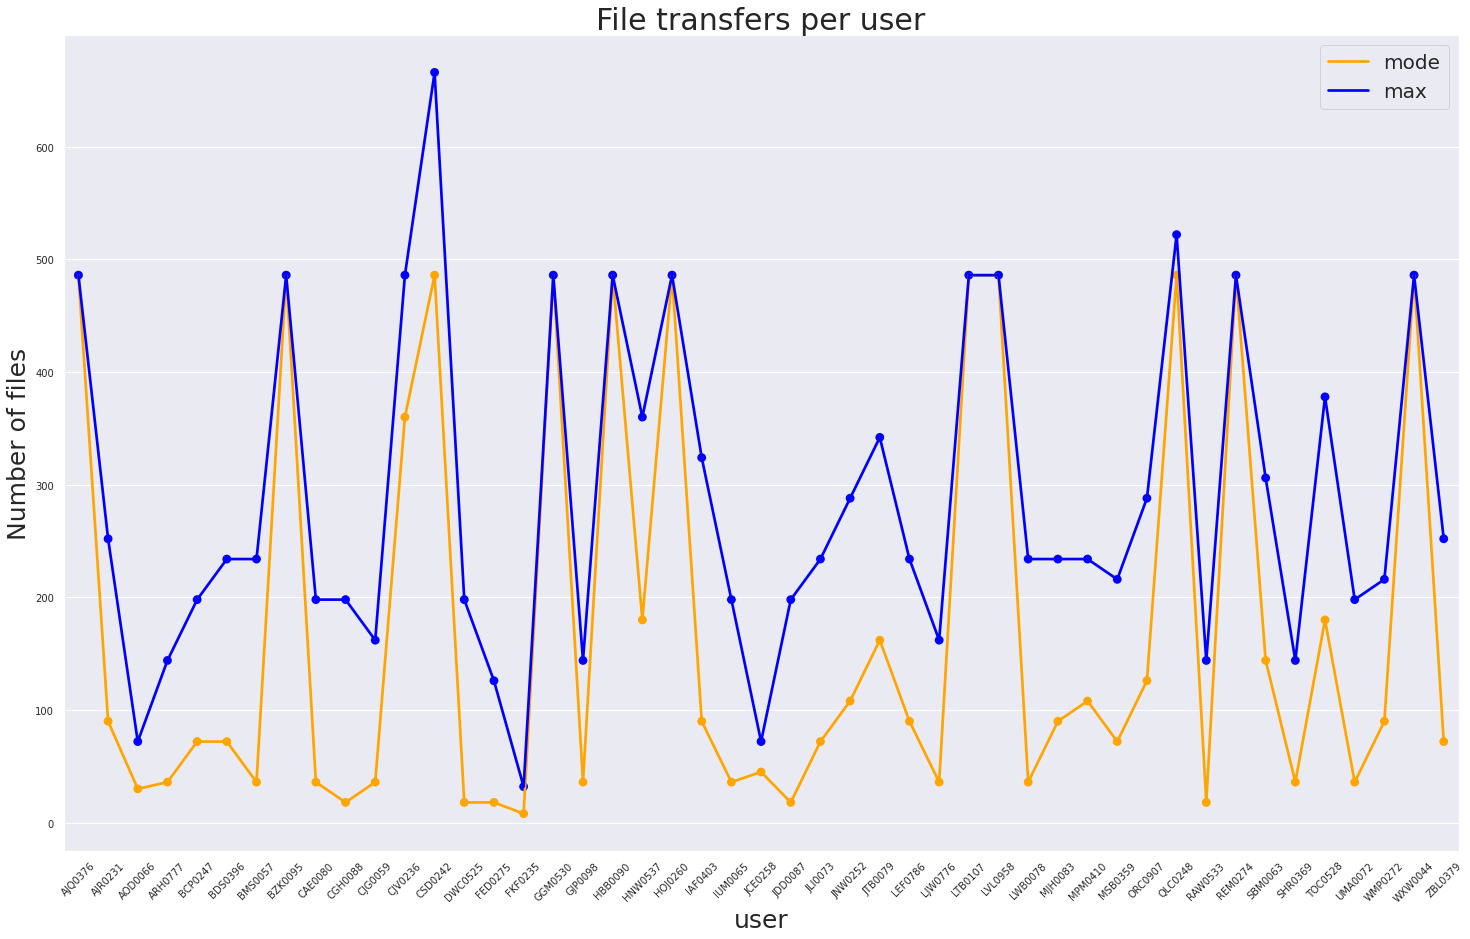

In [ ]:
f, ax = plt.subplots(figsize = (25,15))
x_col='user'

sns.pointplot(ax=ax,x=x_col,y='mode_trasfers_per_user',data=df_files_stats_new, color='orange')
sns.pointplot(ax=ax,x=x_col,y='max_transfers_per_user',data=df_files_stats_new,color='blue')

ax.legend(handles=ax.lines[::len(df_files_stats)+1], labels=["mode", "max"], fontsize = 20)

ax.set_title('File transfers per user', size = 30)
plt.rcParams["axes.labelsize"] = 25
plt.ylabel("Number of files")
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
# plt.legend(fontsize=20)
plt.show()